In [1]:
%load_ext autoreload
%autoreload 2

from pdac_utils import *

import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr

from glob import glob
from matplotlib import pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
genemarkers = load_genemarkers()
pid_versions = get_pid_version_map()
broad_celltypes = get_broad_celltypes()

In [6]:
combinenaivedata = sc.read("/ahg/regevdata/projects/Pancreas/src/data/combinenaivedata-reprocessed-clean-detailed.h5ad")
combinetreateddata = sc.read("/ahg/regevdata/projects/Pancreas/src/data/combinetreateddata-reprocessed-clean-annotated.h5ad")

In [7]:
combinenaivedata.shape, combinetreateddata.shape

((88031, 22164), (50516, 22164))

In [8]:
combinetreateddata.obs['detailed_cell_subsets'] = ['CD4pos_Tregs' if ct=='CD4pos_Treg' else ct for ct in combinetreateddata.obs['detailed_cell_subsets']]

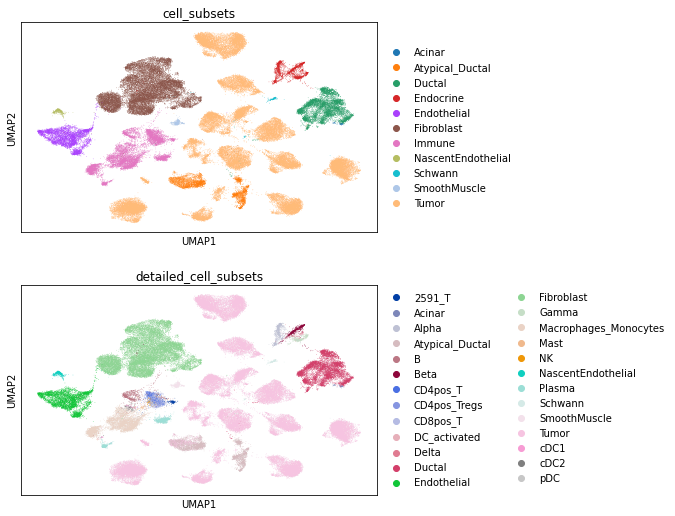

... storing 'detailed_cell_subsets' as categorical


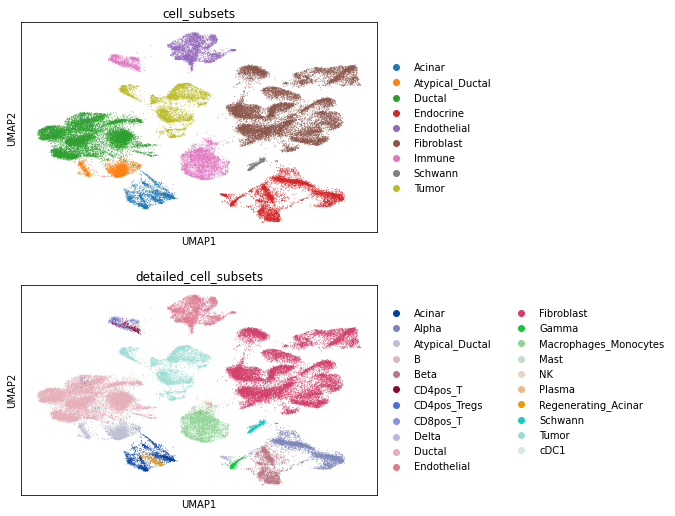

In [9]:
sc.pl.umap(combinenaivedata, color=['cell_subsets', 'detailed_cell_subsets'], ncols=1)
sc.pl.umap(combinetreateddata, color=['cell_subsets', 'detailed_cell_subsets'], ncols=1)

In [10]:
metadata = {
    'PDAC_N_1':(29,'F', 'R1', '2376_10x'),
    'PDAC_N_2':(62,'F', 'R1', '007_10x'),
    'PDAC_N_3':(62,'F', 'R0', '2523_10x'),
    'PDAC_N_4':(68,'M', 'R0', '2276_10x'),
    'PDAC_N_5':(68,'M', 'R1', '2364_10x'),
    'PDAC_N_6':(69,'M', 'R0', '2603_10x'),
    'PDAC_N_7':(73,'M', 'R0', '2498_10x'),
    'PDAC_N_8':(75,'M', 'R0', '011_10x'),
    'PDAC_N_9':(76,'M', 'R1', '2443_10x'),
    'PDAC_N_10':(76,'F', 'R1', '2490_10x'),
    'PDAC_N_11':(77,'F', 'R1', '010T_10x'),
    'PDAC_N_12':(79,'M', 'R1', '2591_10x'),
    'PDAC_N_13':(79,'M', 'R1', '2664_10x'),
    'PDAC_N_14':(81,'F', 'R0', '003_10x'),
    'PDAC_N_15':(88,'M', 'R1', '004_10x'),
    'PDAC_CR_1':(36, 'F', 'R0', '008_10x'),
    'PDAC_CR_2':(51, 'M', 'R1', '2667_10x'),
    'PDAC_CR_3':(58, 'F', 'R0', '2100_10x'),
    'PDAC_CR_4':(62, 'F', 'R0', '2083_10x'),
    'PDAC_CR_5':(67, 'F', 'R1', '2634_10x'),
    'PDAC_CR_6':(69, 'F', 'R0', '009_10x'),
    'PDAC_CR_7':(69, 'M', 'R0', '2540_10x'),
    'PDAC_CR_8':(69, 'M', 'R0', '2668_10x'),
    'PDAC_CR_9':(71, 'M', 'R0', '2229_10x'),
    'PDAC_CR_10':(73, 'M', 'R0', '1624_10x'),
    'PDAC_CR_11':(75, 'F', 'R0', '2507_10x'),
    'PDAC_CR_12':(76, 'M', 'R0', '2675_10x'),
}

In [11]:
metadataflipped = {}
for k, v in metadata.items():
    age, gender, region, sampleid = v
    metadataflipped[sampleid] = (k, age, gender, region)

In [12]:
combinenaivedata.obs['anon_id'] = [metadataflipped[pid][0] for pid in combinenaivedata.obs['pid']]
combinenaivedata.obs['age'] = [metadataflipped[pid][1] for pid in combinenaivedata.obs['pid']]
combinenaivedata.obs['gender'] = [metadataflipped[pid][2] for pid in combinenaivedata.obs['pid']]
combinenaivedata.obs['region'] = [metadataflipped[pid][3] for pid in combinenaivedata.obs['pid']]

In [13]:
combinetreateddata.obs['anon_id'] = [metadataflipped[pid][0] for pid in combinetreateddata.obs['pid']]
combinetreateddata.obs['age'] = [metadataflipped[pid][1] for pid in combinetreateddata.obs['pid']]
combinetreateddata.obs['gender'] = [metadataflipped[pid][2] for pid in combinetreateddata.obs['pid']]
combinetreateddata.obs['region'] = [metadataflipped[pid][3] for pid in combinetreateddata.obs['pid']]

In [14]:
combinenaivedata.obs['status'] = ['Naive']*combinenaivedata.shape[0]
combinetreateddata.obs['status'] = ['Treated']*combinetreateddata.shape[0]

ranking genes


... storing 'anon_id' as categorical
... storing 'gender' as categorical
... storing 'region' as categorical
... storing 'status' as categorical


    finished: added to `.uns['naive_cell_subsets']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:11)


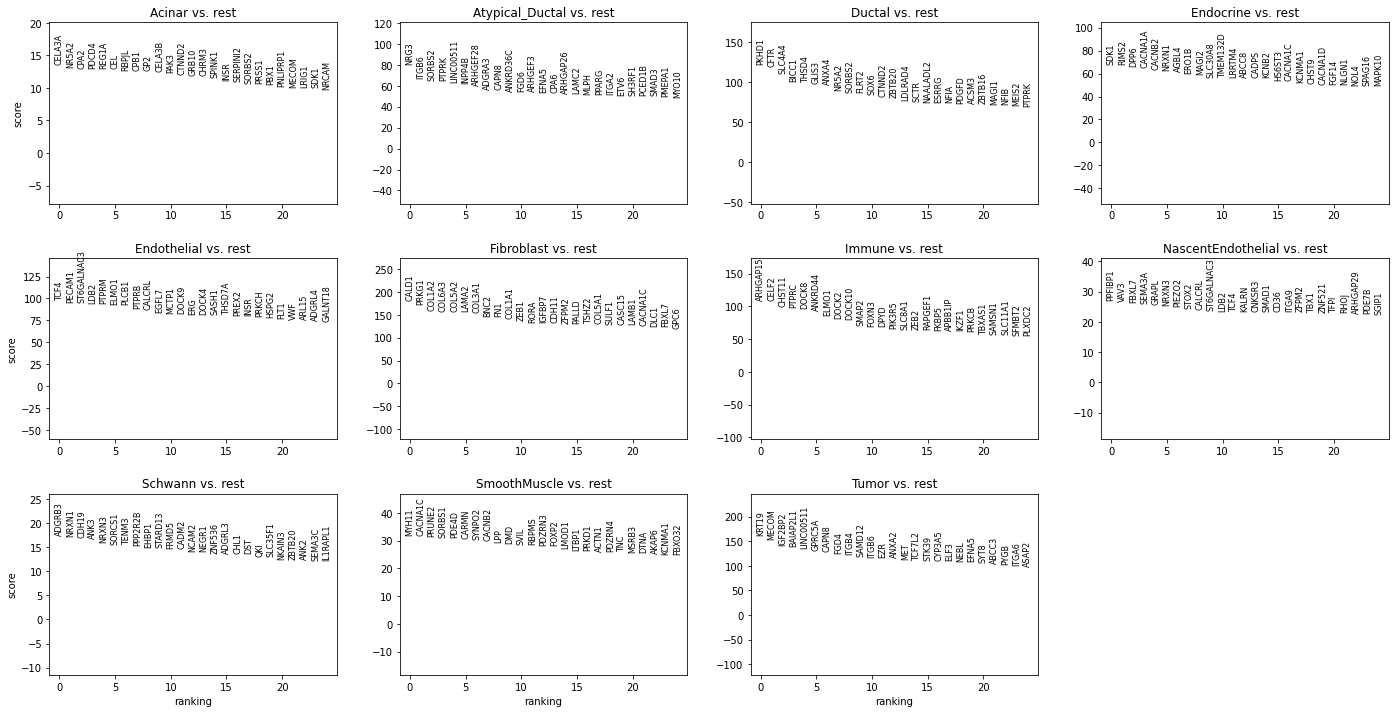

ranking genes
    finished: added to `.uns['naive_detailed_cell_subsets']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:42)


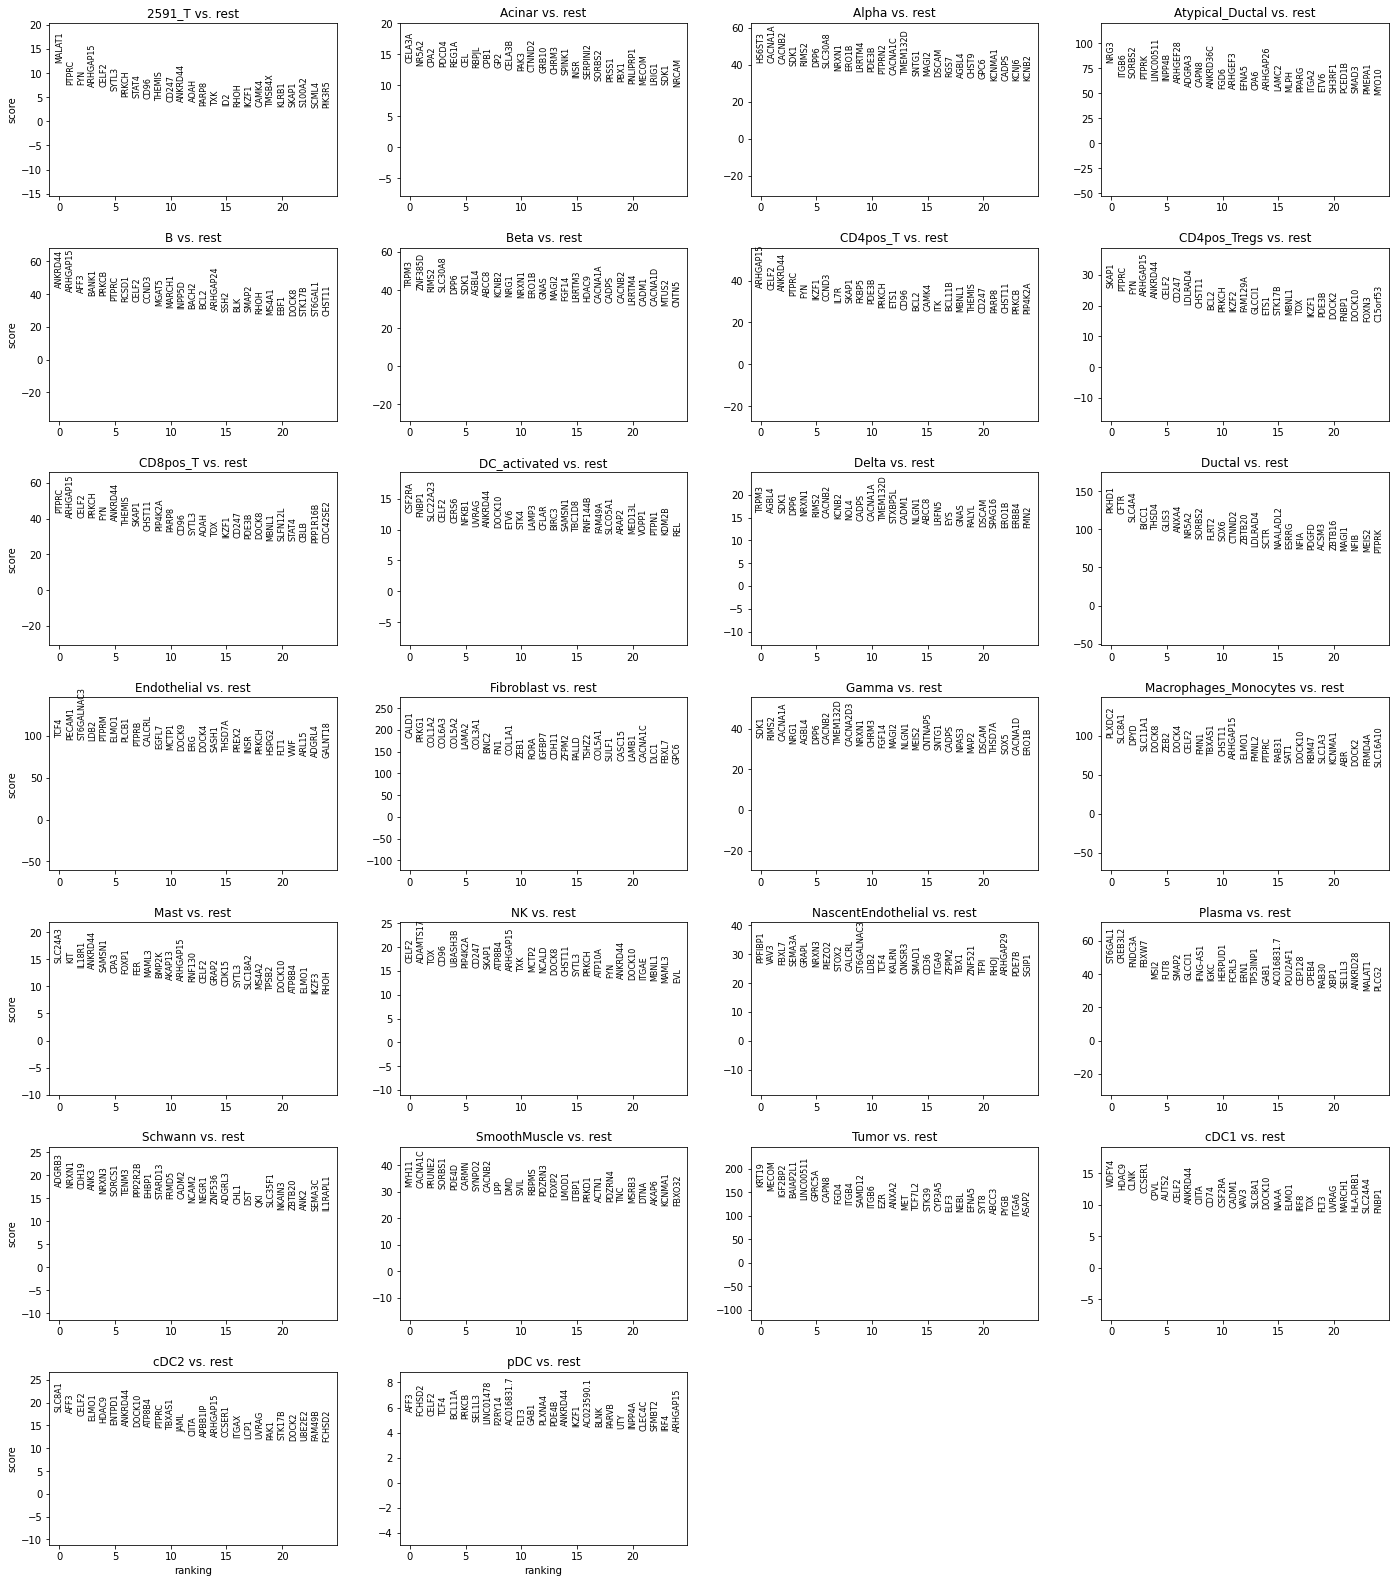

ranking genes


... storing 'anon_id' as categorical
... storing 'gender' as categorical
... storing 'region' as categorical
... storing 'status' as categorical


    finished: added to `.uns['treated_cell_subsets']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:58)


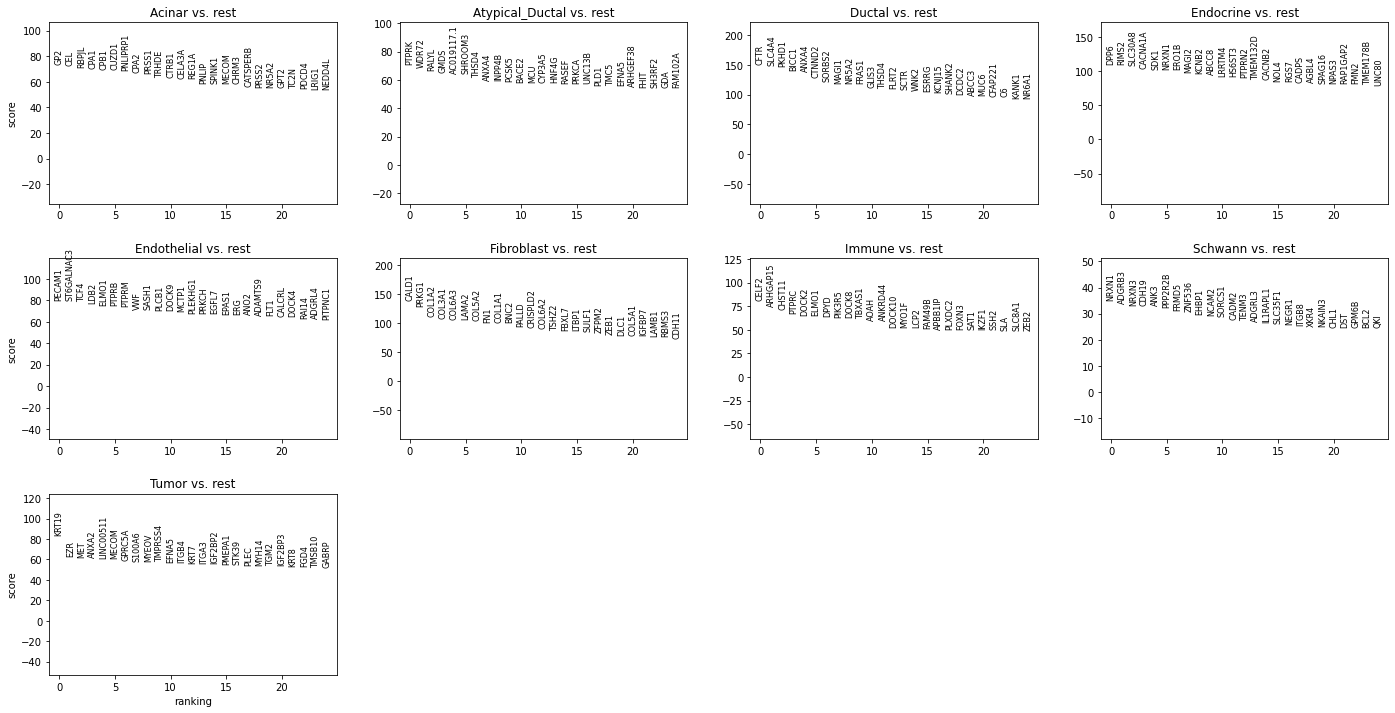

ranking genes
    finished: added to `.uns['treated_detailed_cell_subsets']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:11)


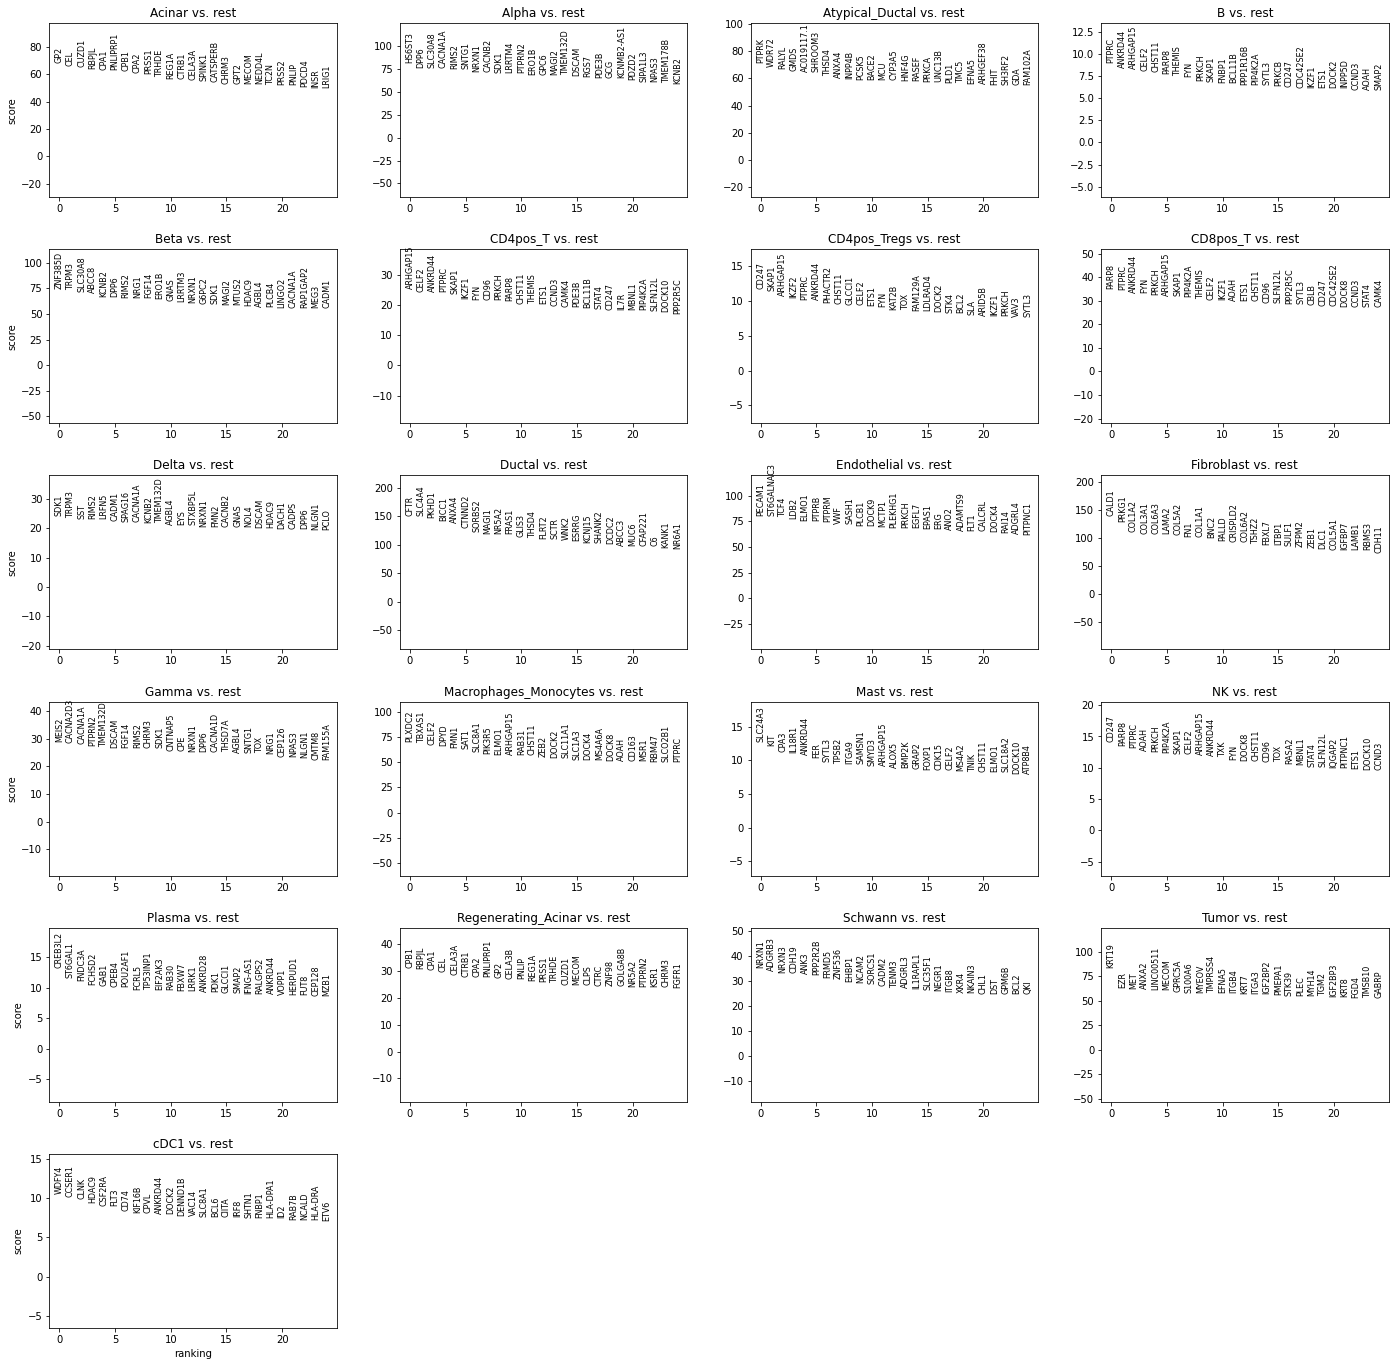

In [15]:
for datatype, data in [('naive', combinenaivedata), ('treated', combinetreateddata)]:
    for celllabel in ['cell_subsets', 'detailed_cell_subsets']:
        sc.tl.rank_genes_groups(data, celllabel, reference='rest', 
                                key_added="%s_%s"%(datatype, celllabel), 
                                method='wilcoxon', n_genes=data.shape[1])
        sc.pl.rank_genes_groups(data, n_genes=25, sharey=False, key="%s_%s"%(datatype, celllabel),
                                save="%s_%s_DE.png"%(datatype, celllabel))

In [12]:
for datatype, data in [('naive', combinenaivedata), ('treated', combinetreateddata)]:
    for celllabel in ['cell_subsets', 'detailed_cell_subsets']:
        out = open("deanalysis/%s_%s_DE.tsv"%(datatype, celllabel), "w")
        out.write("celltype\tgene\tscore\tpval\tlogfoldchange\n")
        key = '%s_%s'%(datatype, celllabel)
        for gene, score, pval, logfold in zip(data.uns[key]['names'], 
                                              data.uns[key]['scores'], 
                                              data.uns[key]['pvals_adj'],
                                              data.uns[key]['logfoldchanges']):
            for celltype in data.uns[key]['names'].dtype.names:
                #if pval[celltype] < 0.05 and np.abs(logfold[celltype]) > 1:
                out.write("%s\t%s\t%.2f\t%.10E\t%.2f\n"%(celltype, gene[celltype], score[celltype], pval[celltype], logfold[celltype]))
        out.close()

In [13]:
combinenaivedata.write('/ahg/regevdata/projects/Pancreas/src/data/combinenaivedata-reprocessed-final.h5ad')
combinetreateddata.write('/ahg/regevdata/projects/Pancreas/src/data/combinetreateddata-reprocessed-final.h5ad')

In [ ]:
combinenaivedata = sc.read('/ahg/regevdata/projects/Pancreas/src/data/combinenaivedata-reprocessed-final.h5ad')
combinetreateddata = sc.read('/ahg/regevdata/projects/Pancreas/src/data/combinetreateddata-reprocessed-final.h5ad')

In [14]:
totaldata = combinenaivedata.concatenate([combinetreateddata])

In [15]:
for celllabel in ['cell_subsets', 'detailed_cell_subsets']:
    delabel = []
    for status, celltype in zip(totaldata.obs['status'], totaldata.obs[celllabel]):
        delabel.append(status+ '_' + celltype)
    totaldata.obs['delabel_%s'%celllabel] = delabel

In [16]:
cellcounter = Counter(totaldata.obs['delabel_%s'%'cell_subsets'])

In [17]:
for celllabel in ['cell_subsets', 'detailed_cell_subsets']:
    cellcounter = Counter(totaldata.obs['delabel_%s'%celllabel])
    for celltype in set(totaldata.obs[celllabel]):
        if cellcounter.get('Naive_%s'%celltype, 0) > 10 and cellcounter.get('Treated_%s'%celltype, 0):
            sc.tl.rank_genes_groups(totaldata, "delabel_%s"%celllabel, groups=['Treated_%s'%celltype], 
                                reference='Naive_%s'%celltype,  
                                method='wilcoxon', n_genes=totaldata.shape[1], key_added='de_%s_%s'%(celllabel, celltype))

ranking genes


... storing 'annot_level_1' as categorical
... storing 'annot_level_2' as categorical
... storing 'anon_id' as categorical
... storing 'cell_subsets' as categorical
... storing 'celltypes' as categorical
... storing 'detailed_cell_subsets' as categorical
... storing 'leiden' as categorical
... storing 'pid' as categorical
... storing 'status' as categorical
... storing 'delabel_cell_subsets' as categorical
... storing 'delabel_detailed_cell_subsets' as categorical


    finished: added to `.uns['de_cell_subsets_Schwann']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)
ranking genes
    finished: added to `.uns['de_cell_subsets_Acinar']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)
ranking genes
    finished: added to `.uns['de_cell_subsets_Endocrine']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to

In [18]:
contamination = {}
for ctlabel in ['cell_subsets', 'detailed_cell_subsets']:
    for ct in set(combinetreateddata.obs[ctlabel]):
        scores = pd.DataFrame(combinetreateddata.uns['treated_%s'%ctlabel]['scores'])[ct]
        names = pd.DataFrame(combinetreateddata.uns['treated_%s'%ctlabel]['names'])[ct]
        threshold = np.mean(scores) - 6*np.std(scores)
        contamination_genes = names[scores<threshold]
        contamination['treated' + '_' + ctlabel + '_' + ct] = contamination_genes
    for ct in set(combinenaivedata.obs[ctlabel]):
        scores = pd.DataFrame(combinenaivedata.uns['naive_%s'%ctlabel]['scores'])[ct]
        names = pd.DataFrame(combinenaivedata.uns['naive_%s'%ctlabel]['names'])[ct]
        threshold = np.mean(scores) - 6*np.std(scores)
        contamination_genes = names[scores<threshold]
        contamination['naive' + '_' + ctlabel + '_' + ct] = contamination_genes

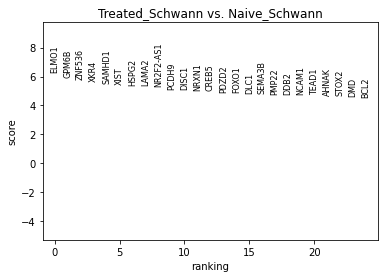

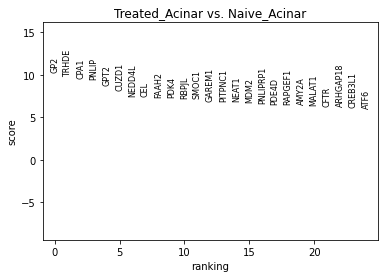

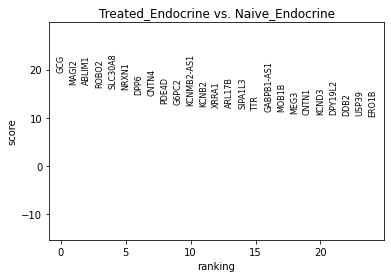

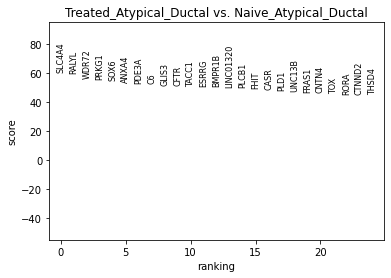

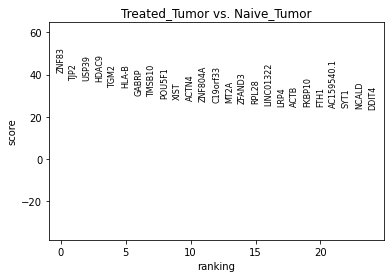

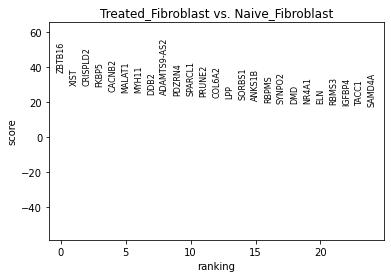

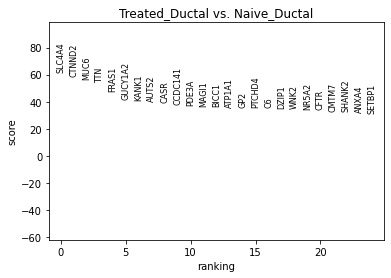

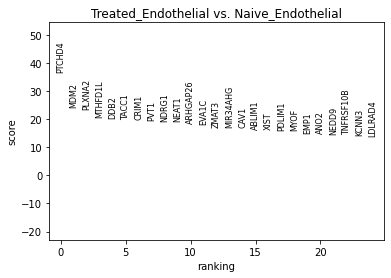

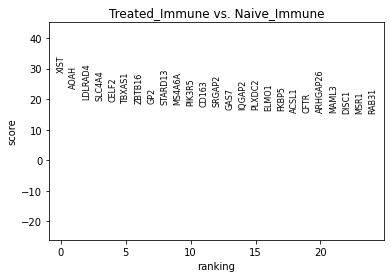

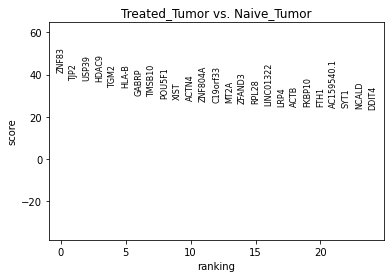

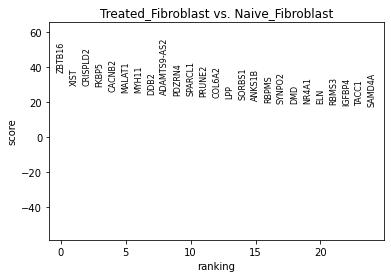

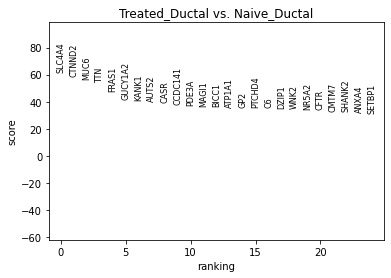

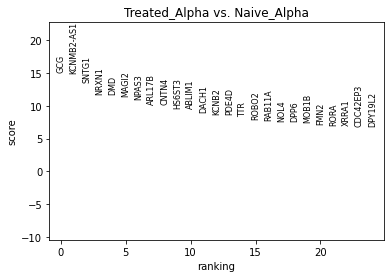

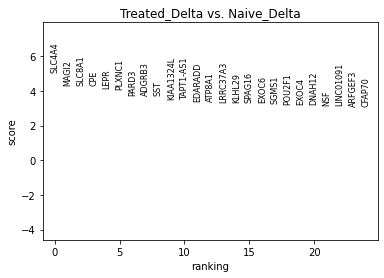

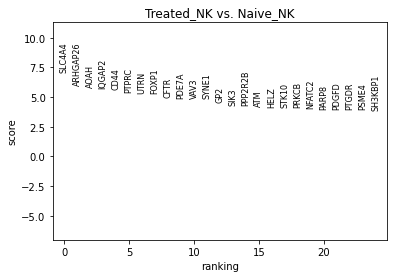

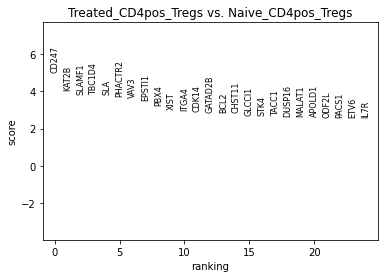

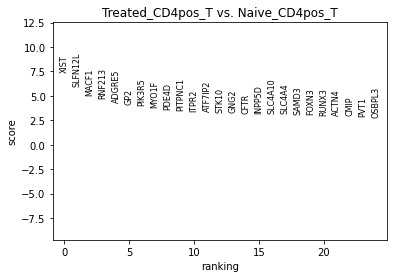

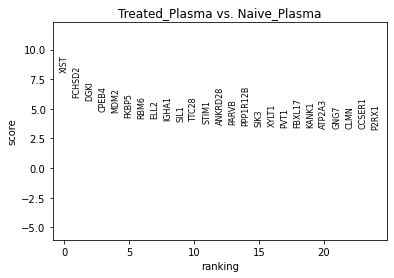

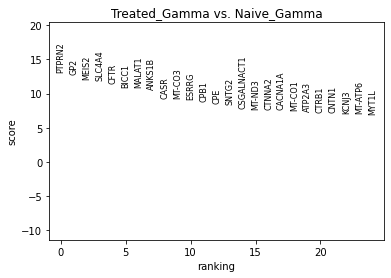

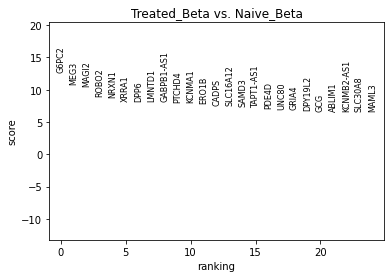

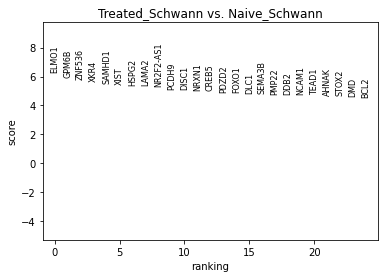

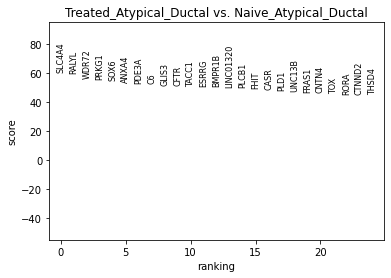

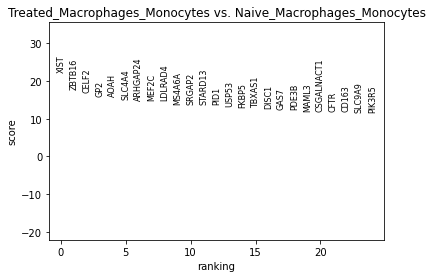

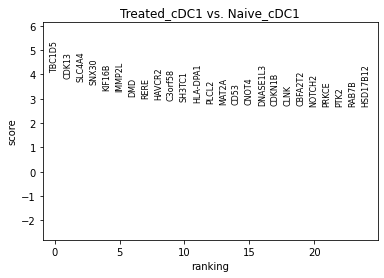

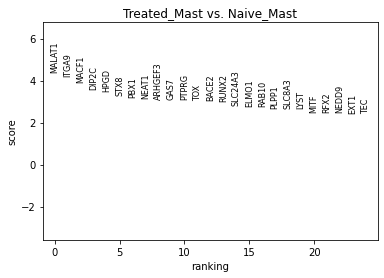

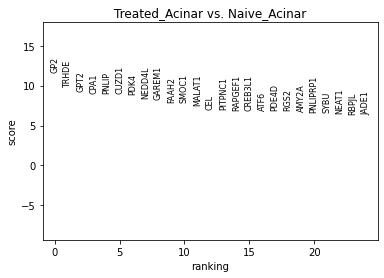

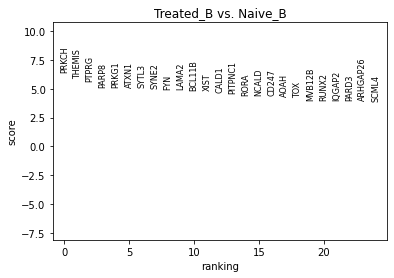

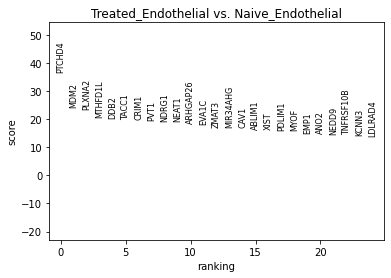

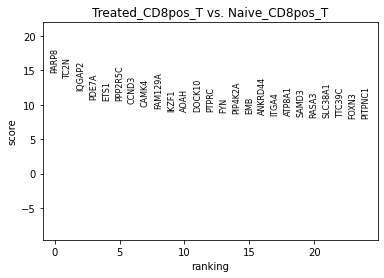

In [19]:
for celllabel in ['cell_subsets', 'detailed_cell_subsets']:
    
    for celltype in set(totaldata.obs[celllabel]):
        if 'de_%s_%s'%(celllabel, celltype) not in totaldata.uns:
            continue
        sc.pl.rank_genes_groups(totaldata, key='de_%s_%s'%(celllabel, celltype), n_genes=25, sharey=False)

        out = open("deanalysis/DE_%s.%s.tsv"%(celllabel, celltype), "w")
        out.write("celltype\tgene\tscore\tpval\tlogfoldchange\n")
        key = 'de_%s_%s'%(celllabel, celltype)
        for gene, score, pval, logfold in zip(totaldata.uns[key]['names'], 
                                              totaldata.uns[key]['scores'], 
                                              totaldata.uns[key]['pvals_adj'],
                                              totaldata.uns[key]['logfoldchanges']):
            for decelltype in totaldata.uns[key]['names'].dtype.names:
                #if pval["Treated_"+celltype] < 0.05 and logfold["Treated_"+celltype] > 1:
                if gene[decelltype] in contamination['naive_' + celllabel + '_' + celltype] or gene[decelltype] in contamination['treated_' + celllabel + '_' + celltype]:
                    out.write("%s\t%s\t%.2f\t%.10E\t%.2f\n"%(celltype, gene[decelltype], 0, 1, 0))
                else:
                    out.write("%s\t%s\t%.2f\t%.10E\t%.2f\n"%(celltype, gene[decelltype], score[decelltype], pval[decelltype], logfold[decelltype]))
        out.close()

In [20]:
nobrcadata = totaldata[(totaldata.obs['pid']!='008_10x') & (totaldata.obs['pid']!='2667_10x') & (totaldata.obs['pid']!='2229_10x')]

In [21]:
for celllabel in ['cell_subsets', 'detailed_cell_subsets']:
    cellcounter = Counter(nobrcadata.obs['delabel_%s'%celllabel])
    for celltype in set(nobrcadata.obs[celllabel]):
        if cellcounter.get('Naive_%s'%celltype, 0) > 10 and cellcounter.get('Treated_%s'%celltype, 0):
            sc.tl.rank_genes_groups(nobrcadata, "delabel_%s"%celllabel, groups=['Treated_%s'%celltype], 
                                    reference='Naive_%s'%celltype,  
                                    method='wilcoxon', n_genes=nobrcadata.shape[1], key_added='de_%s_%s'%(celllabel, celltype))

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['de_cell_subsets_Schwann']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)
ranking genes
    finished: added to `.uns['de_cell_subsets_Acinar']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)
ranking genes
    finished: added to `.uns['de_cell_subsets_Endocrine']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to

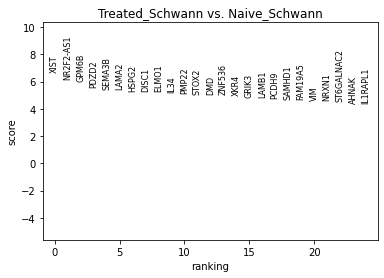

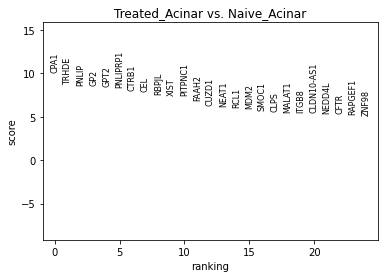

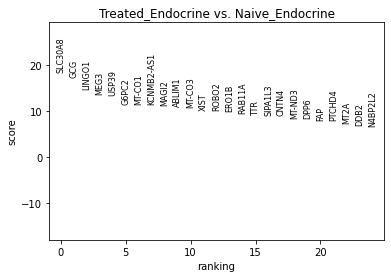

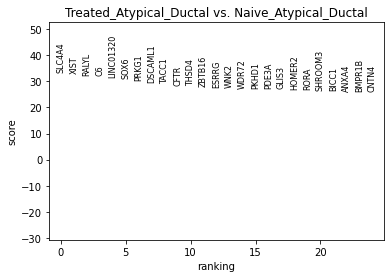

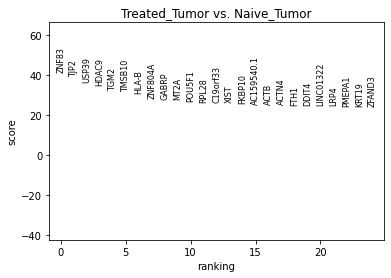

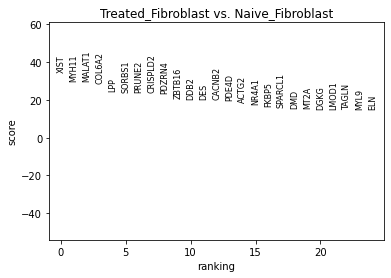

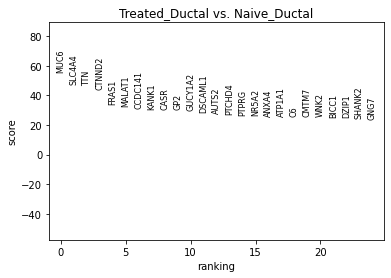

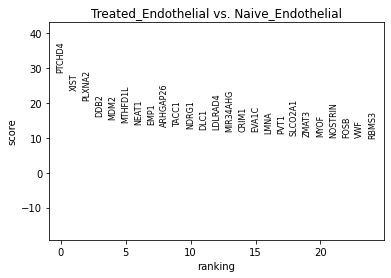

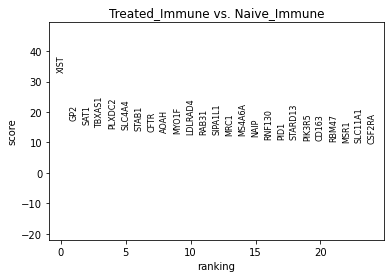

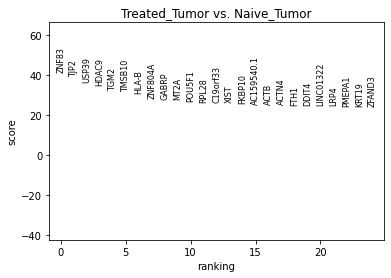

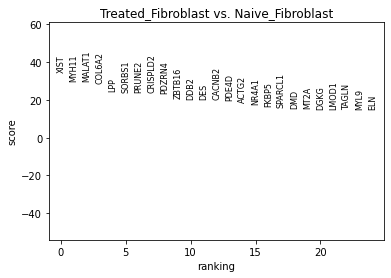

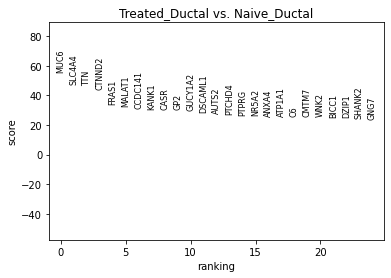

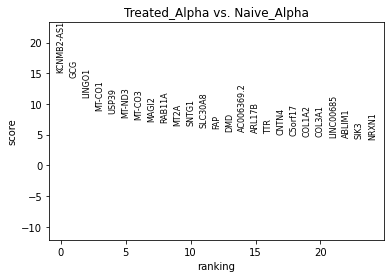

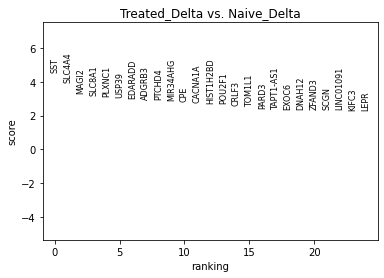

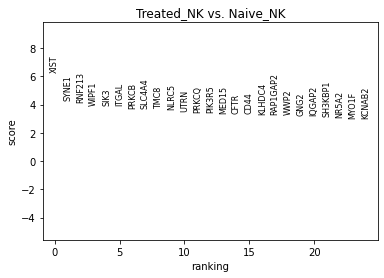

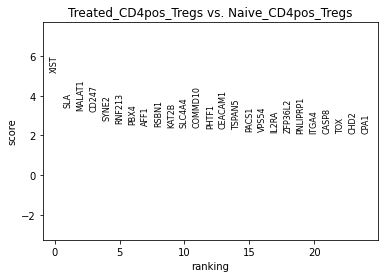

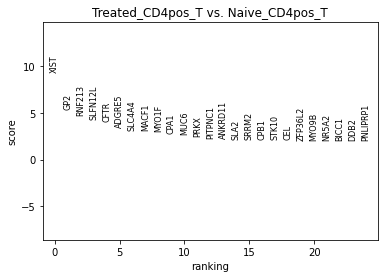

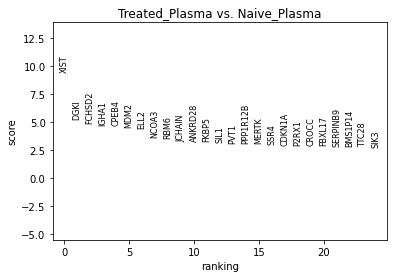

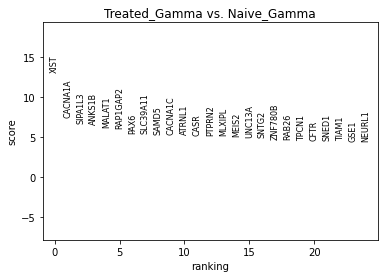

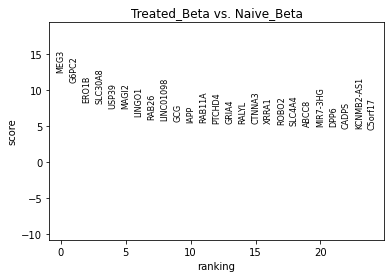

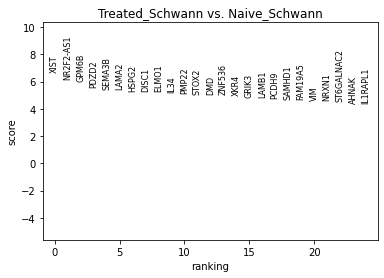

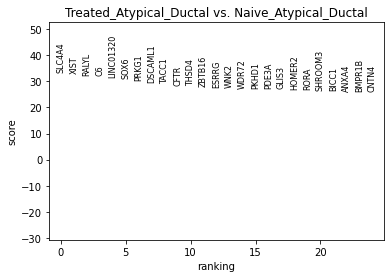

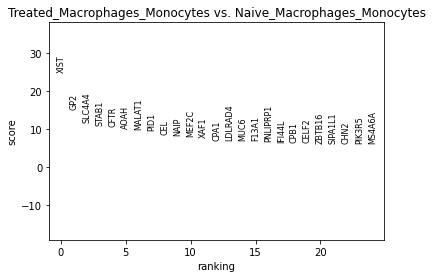

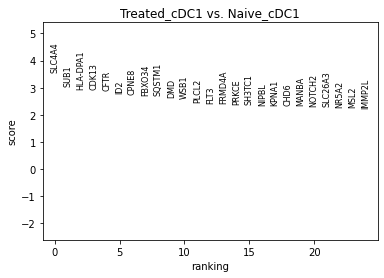

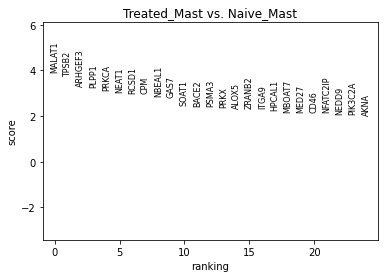

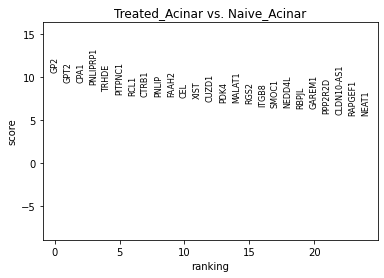

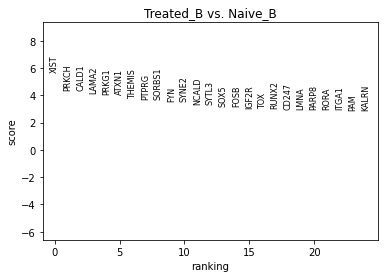

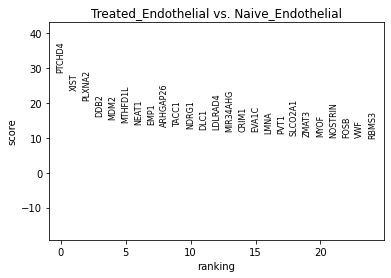

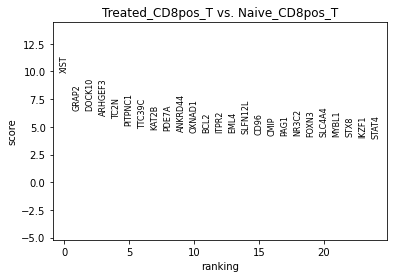

In [22]:
for celllabel in ['cell_subsets', 'detailed_cell_subsets']:
      
    for celltype in set(nobrcadata.obs[celllabel]):
        if 'de_%s_%s'%(celllabel, celltype) not in nobrcadata.uns:
            continue
        sc.pl.rank_genes_groups(nobrcadata, key='de_%s_%s'%(celllabel, celltype), n_genes=25, sharey=False)

        out = open("deanalysis/nobrcaDE_%s.%s.tsv"%(celllabel, celltype), "w")
        out.write("celltype\tgene\tscore\tpval\tlogfoldchange\n")
        key = 'de_%s_%s'%(celllabel, celltype)
        for gene, score, pval, logfold in zip(nobrcadata.uns[key]['names'], 
                                              nobrcadata.uns[key]['scores'], 
                                              nobrcadata.uns[key]['pvals_adj'],
                                              nobrcadata.uns[key]['logfoldchanges']):
            for decelltype in nobrcadata.uns[key]['names'].dtype.names:
                #if pval["Treated_"+celltype] < 0.05 and logfold["Treated_"+celltype] > 1:
                if gene[decelltype] in contamination['naive_' + celllabel + '_' + celltype] or gene[decelltype] in contamination['treated_' + celllabel + '_' + celltype]:
                    out.write("%s\t%s\t%.2f\t%.10E\t%.2f\n"%(celltype, gene[decelltype], 0, 1, 0))
                else:
                    out.write("%s\t%s\t%.2f\t%.10E\t%.2f\n"%(celltype, gene[decelltype], score[decelltype], pval[decelltype], logfold[decelltype]))
        out.close()

In [16]:
combinetreateddata.obs['Residual'] = ['MinimumResidual'] * combinetreateddata.shape[0]
combinetreateddata.obs['Residual'][(combinetreateddata.obs['pid']=='2634_10x')|(combinetreateddata.obs['pid']=='2540_10x')|(combinetreateddata.obs['pid']=='1624_10x') |(combinetreateddata.obs['pid']=='2507_10x')] = 'HighResidual'

/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
treatedtumor = combinetreateddata[combinetreateddata.obs['cell_subsets']=='Tumor']

In [18]:
Counter(treatedtumor.obs['Residual'])

Counter({'MinimumResidual': 434, 'HighResidual': 3581})

In [19]:
for celllabel in ['cell_subsets', 'detailed_cell_subsets']:
    celltype = 'Tumor'
    treatedtumor = combinetreateddata[combinetreateddata.obs[celllabel]==celltype]
    sc.tl.rank_genes_groups(treatedtumor, "Residual", groups=['HighResidual'], 
                                reference='MinimumResidual',  
                                method='wilcoxon', n_genes=treatedtumor.shape[1], key_added='Residual')
    out = open("deanalysis/residualDE_%s.tsv"%celllabel, "w")
    out.write("celltype\tgene\tscore\tpval\tlogfoldchange\n")
    key = 'de_%s_%s'%(celllabel, celltype)
    for gene, score, pval, logfold in zip(treatedtumor.uns['Residual']['names'], 
                                          treatedtumor.uns['Residual']['scores'], 
                                          treatedtumor.uns['Residual']['pvals_adj'],
                                          treatedtumor.uns['Residual']['logfoldchanges']):
        for decelltype in treatedtumor.uns['Residual']['names'].dtype.names:
            #if pval["Treated_"+celltype] < 0.05 and logfold["Treated_"+celltype] > 1:
            out.write("%s\t%s\t%.2f\t%.10E\t%.2f\n"%(celltype, gene[decelltype], score[decelltype], pval[decelltype], logfold[decelltype]))
    out.close()

ranking genes


/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/anndata/_core/anndata.py:1172: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Residual' as categorical


    finished: added to `.uns['Residual']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)
ranking genes


/home/unix/kjag/.conda/envs/pegasus/lib/python3.7/site-packages/anndata/_core/anndata.py:1172: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Residual' as categorical


    finished: added to `.uns['Residual']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:05)
running Leiden clustering
    finished: found 52 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


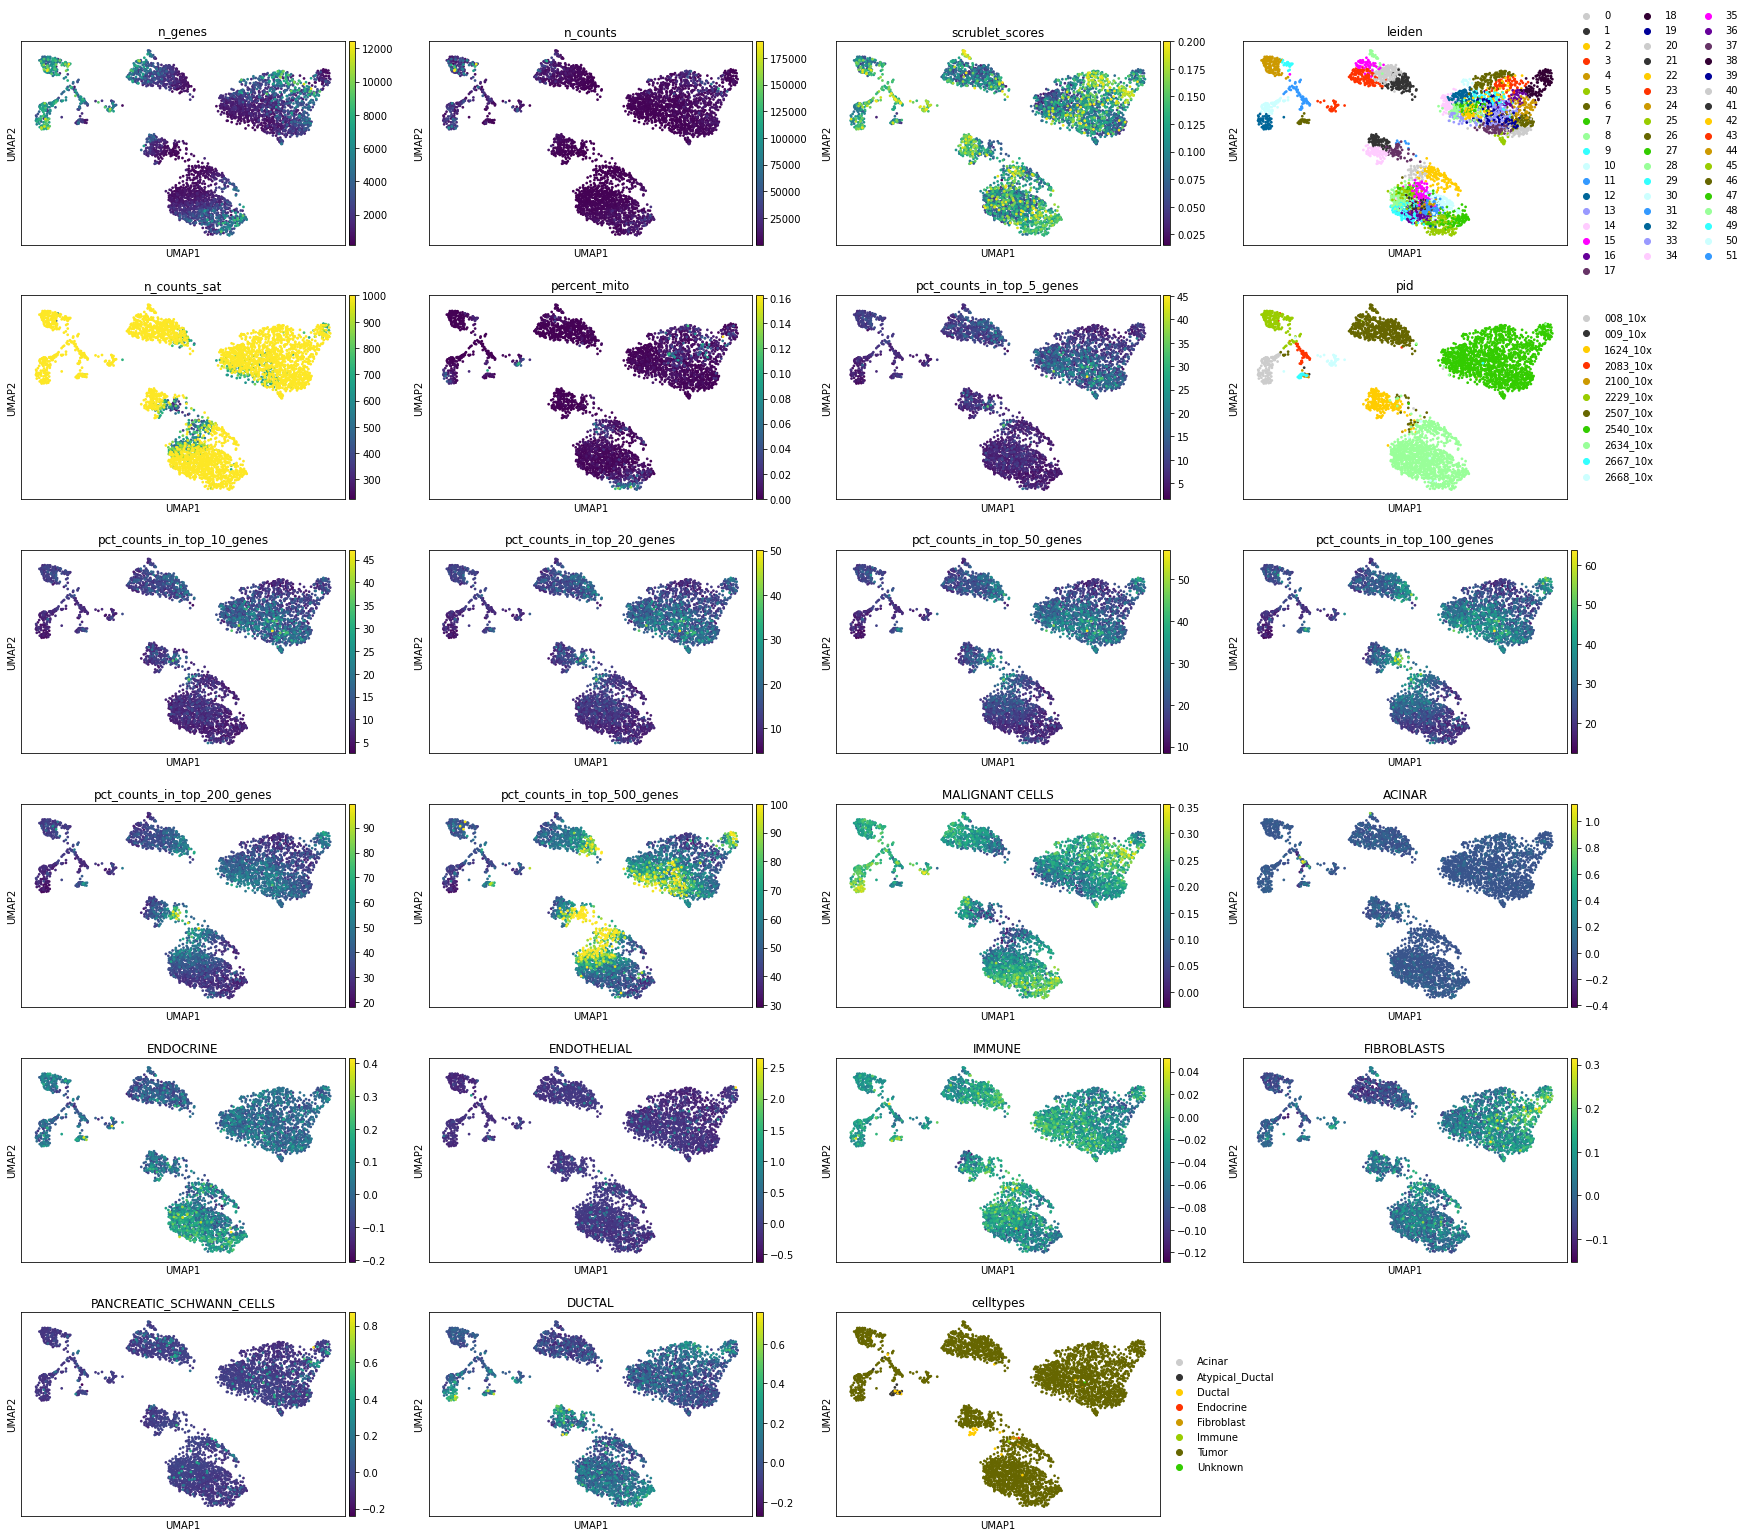

AnnData object with n_obs × n_vars = 4015 × 22164 
    obs: 'ACINAR', 'APC', 'Activated_Stellate', 'Alpha', 'B_cell', 'Bailey_progenitor', 'Bailey_squamous', 'Bcell_memory', 'Bcell_naive', 'Beta', 'CAF', 'CD4_Tcells', 'CD4_follicular_helper', 'CD4_memory_activated', 'CD4_memory_resting', 'CD4_naive', 'CD4_regulatory', 'CD8_Tcells', 'CD8_exhausted', 'CD8_gammadelta', 'Collison_QM', 'Collison_classical', 'DC_activated', 'DUCTAL', 'Davidson_CAF1', 'Davidson_CAF2', 'Davidson_CAF3', 'Delta', 'ENDOCRINE', 'ENDOTHELIAL', 'Eosinophils', 'Episilon', 'FIBROBLASTS', 'Gamma', 'IMMUNE', 'Immune_Stellate', 'M0', 'M1', 'M2', 'MALIGNANT CELLS', 'Macrophage', 'Mast', 'Mast_Resting', 'Mast_activated', 'Moffitt_basal', 'Moffitt_classical', 'Monocytes_1', 'Monocytes_2', 'NK', 'NK_activated', 'NK_resting', 'Neutrophils', 'Neuzillet_CAFa', 'Neuzillet_CAFb', 'Neuzillet_CAFc', 'Neuzillet_CAFd', 'PANCREATIC_SCHWANN_CELLS', 'PanCAF', 'Pan_Immune', 'Pan_Stellate', 'Plasma', 'Quiescent_Stellate', 'Tuveson_iCAF', 

In [27]:
recompute_umap(treatedtumor)

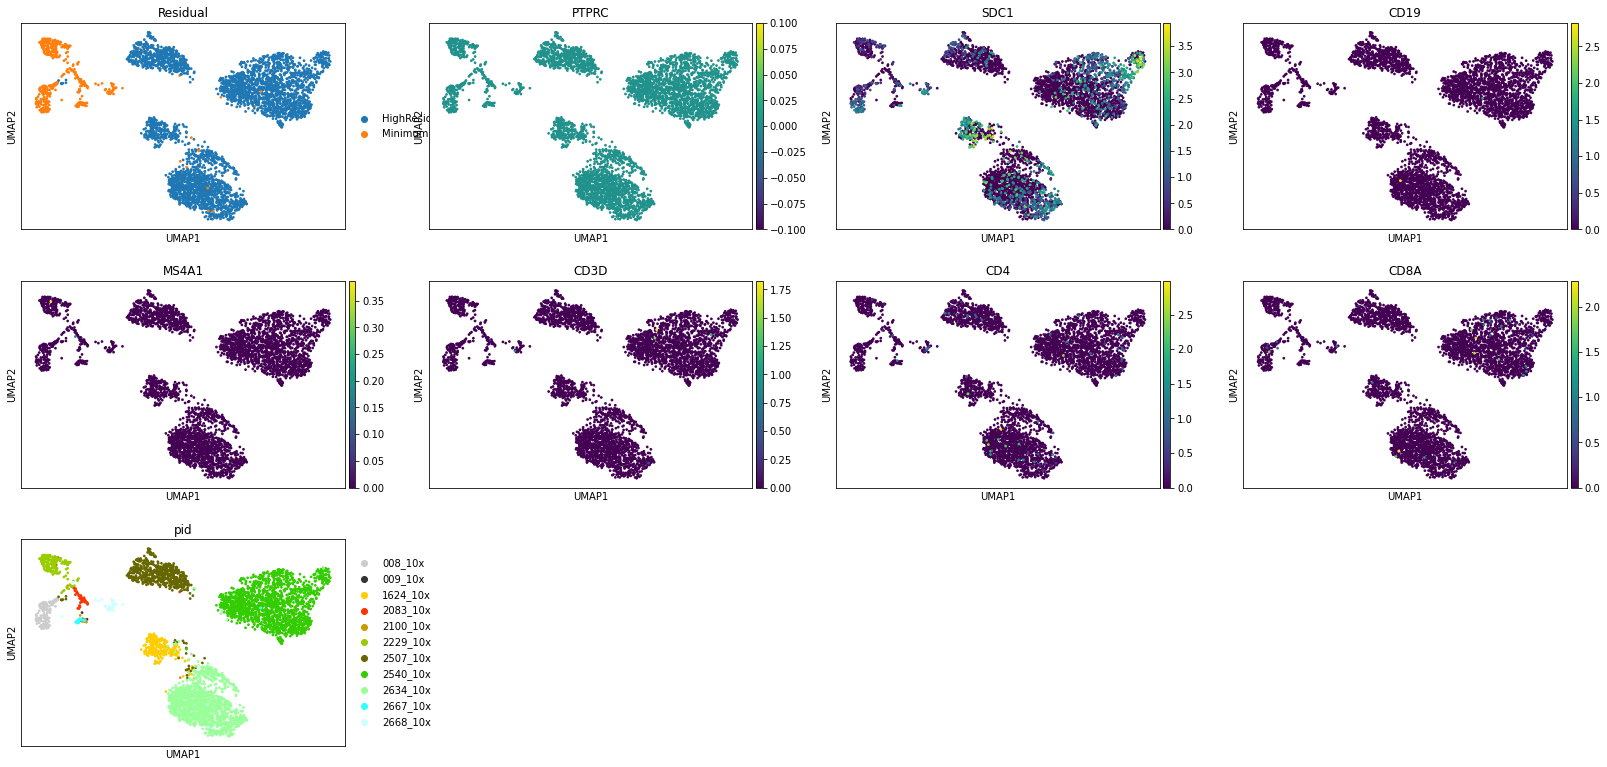

In [28]:
sc.pl.umap(treatedtumor, color=['Residual', 'PTPRC', 'SDC1', 'CD19','MS4A1', 'CD3D', 'CD4', 'CD8A', 'pid'])

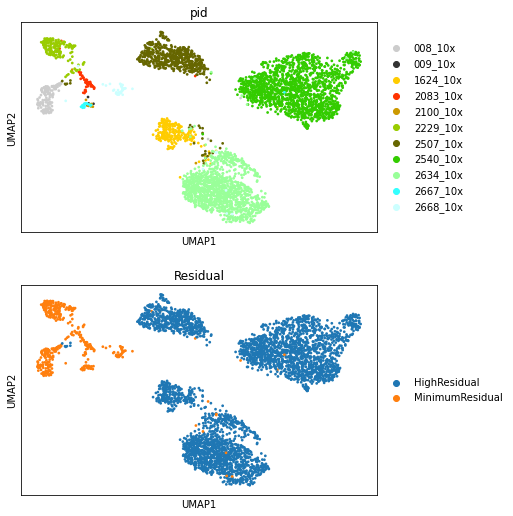

In [29]:
sc.pl.umap(treatedtumor, color=['pid', 'Residual'], ncols=1)

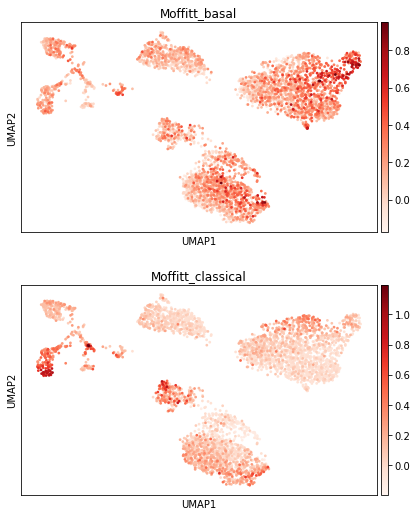

In [30]:
sc.pl.umap(treatedtumor, color=['Moffitt_basal', 'Moffitt_classical'], ncols=1, color_map='Reds')

In [22]:
df = pd.read_csv("deanalysis/residualDE_detailed_cell_subsets.tsv", sep='\t')

In [24]:
df[(df.pval < .001)&]

celltype        gene  score           pval  logfoldchange
0        Tumor      TMSB10  13.91   1.846793e-42           2.50
1        Tumor        TJP2  13.72   2.212841e-41           3.59
2        Tumor      PMEPA1  13.06   1.269206e-37           1.59
3        Tumor       ZNF83  12.74   6.623026e-36           1.69
4        Tumor   LINC00511  12.40   4.125181e-34           1.40
...        ...         ...    ...            ...            ...
22159    Tumor       KDM4C -22.87  4.368099e-112          -3.17
22160    Tumor       MAGI1 -22.97  5.708443e-113          -2.43
22161    Tumor  AC016831.7 -23.42  1.893823e-117          -2.95
22162    Tumor        MIA2 -23.76  8.563003e-121          -4.58
22163    Tumor  AC019117.1 -27.25  3.273491e-159          -5.77

[10648 rows x 5 columns]